# Práctica No. 2

## Extracción de datos

In [158]:
import pandas as pd
global df
global printRes
path = "data.csv"
printRes = False
try:
    df = pd.read_csv(path)
    print("\n" + str(len(df)) +  " DATOS EXTRAÍDOS CON ÉXITO\n\n")
except Exception as e:
    print(f"ERROR AL EXTRAER INFORMACIÓN DEL ARCHIVO: {e}")
    


9595 DATOS EXTRAÍDOS CON ÉXITO




## Limpieza y transformación de datos

- **Colocando Rating 0 a todos los que tengan nulo**

In [159]:
global df
global printRes
df['Rating'] = df['Rating'].replace([""," ","NULL","null"], "0")
df['Rating'] = df['Rating'].fillna("0")
if printRes:
    print(df['Rating'])

- **Colocando "not specified" a los niveles no indicados**

In [160]:
global df
global printRes
df['Level'] = df['Level'].replace([""," ","NULL","null"], "Not especified")
df['Level'] = df['Level'].fillna("Not especified")
if printRes:
    print(df['Level'])

- **Estandarizando duración**

In [161]:
import pandas as pd
import numpy as np
import re

def convertir_a_horas(texto):
    texto = str(texto).lower()
    
    # Caso: "X month(s) at Y hours a week"
    if 'month' in texto and 'hour' in texto:
        meses = re.search(r'(\d+)\s*month', texto)
        horas = re.search(r'(\d+)\s*hours?', texto)
        if meses and horas:
            semanas = int(meses.group(1)) * 4
            return semanas * int(horas.group(1))
    
    # Caso: "X weeks at Y hours a week"
    semanas = re.search(r'(\d+)\s*weeks?', texto)
    horas = re.search(r'(\d+)\s*hours?', texto)
    if semanas and horas:
        return int(semanas.group(1)) * int(horas.group(1))

    # Caso: "X hours"
    horas = re.search(r'(\d+\.?\d*)\s*hours?', texto)
    if horas:
        return float(horas.group(1))

    return np.nan

print(df[['Duration']])
df['Duration'] = df['Duration'].fillna("0 hours")
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.replace(r" \(approximately\)| to complete|Approx\. ", "", regex=True)

df['Duration'] = df['Duration'].apply(convertir_a_horas)
df['Duration'] = df['Duration'].fillna(0)
if printRes:
    print(df[['Duration']].head())


                          Duration
0         20 hours (approximately)
1     Approx. 34 hours to complete
2          9 hours (approximately)
3      Approx. 8 hours to complete
4     Approx. 11 hours to complete
...                            ...
9590   Approx. 7 hours to complete
9591                           NaN
9592   Approx. 5 hours to complete
9593                        1 hour
9594                           NaN

[9595 rows x 1 columns]


- **Estandarizando horario**

In [162]:
global df
global printRes
df['Schedule'] = df['Schedule'].fillna("Specific schedule")
if printRes:
    print(df['Schedule'])

- **Agregando reviews**

In [163]:
global df
global printRes
df['Review'] = df['Review'].fillna("0 Reviews")
df['Review'] = df['Review'].str.extract(r'(\d+\.?\d*)')
df['Review'] = df['Review'].astype(float)
if printRes:
    print(df['Review'])

- **Agregando What you will learn?**

In [164]:
global df
global printRes
df['What you will learn'] = df['What you will learn'].fillna("Not specified")
if printRes:
    print(df['What you will learn'])

## Visualizaciones

- **Gráfica de barras de cursos por nivel**

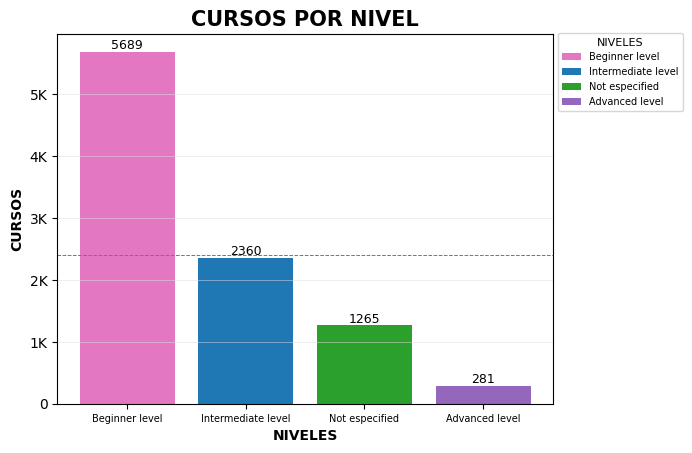

In [165]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def formatear_k(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}K'
    return int(x)

fig, ax = plt.subplots()
cursos_nivel = df['Level'].value_counts()
niveles = df['Level'].unique()
bar_colors = ['tab:pink', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange', 'tab:gray', 'tab:brown', 'tab:olive', 'tab:cyan']

ax.bar(niveles, cursos_nivel, label=niveles, color=bar_colors)
for i, nivel in enumerate(niveles):
    cantidad = cursos_nivel.loc[nivel]
    ax.text(i, cantidad + 1, str(cantidad) + '', ha='center', va='bottom', fontsize=9)
ax.set_ylabel('CURSOS', fontsize=10, fontweight='bold')
ax.set_xlabel('NIVELES', fontsize=10, fontweight='bold')
ax.legend(title='NIVELES', fontsize=7, loc='upper left', bbox_to_anchor=(1,1.015), title_fontsize=8)
ax.set_title('CURSOS POR NIVEL', fontsize=15, fontweight='bold')

ax.xaxis.set_tick_params(rotation=0)
ax.xaxis.set_tick_params(labelsize=7)

ax.yaxis.set_major_formatter(FuncFormatter(formatear_k))
ax.grid(axis='y', linestyle='-', alpha=0.7, linewidth=0.5, color='#dddce0')
promedio = cursos_nivel.mean()
ax.axhline(y=promedio, color='#757476', linestyle='--', linewidth=0.7 )

plt.show()

- **Gráfica de barras horizontal por categoría**

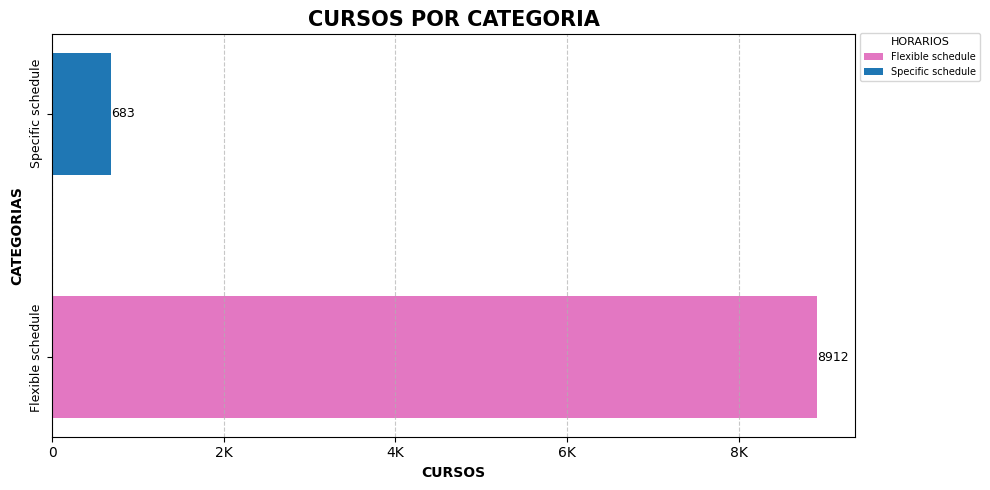

In [166]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cursos_schedule = df['Schedule'].value_counts()
valores = cursos_schedule.values
horarios = df['Schedule'].unique()

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['tab:pink', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange', 'tab:gray', 'tab:brown', 'tab:olive', 'tab:cyan']
# Barras horizontales
ax.barh(horarios, valores, color=bar_colors,  height=0.5, label=horarios)

# Etiquetas con número de cursos
for i, valor in enumerate(valores):
    ax.text(valor + 1, i, str(valor), va='center', fontsize=9)

# Formateador en 'k'
def formatear_k(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}K'
    return int(x)

ax.xaxis.set_major_formatter(FuncFormatter(formatear_k))

# Título y etiquetas
ax.set_xlabel('CURSOS', fontsize=10, fontweight='bold')
ax.set_ylabel('CATEGORIAS', fontsize=10, fontweight='bold')
ax.set_title('CURSOS POR CATEGORIA', fontsize=15, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(title='HORARIOS', fontsize=7, loc='upper left', bbox_to_anchor=(1,1.015), title_fontsize=8)
ax.yaxis.set_tick_params(rotation=90, labelsize=9)
for label in ax.get_yticklabels():
    label.set_verticalalignment('center')
plt.tight_layout()
plt.show()


- **Gráfico de dispersión entre duración y número de revisiones**

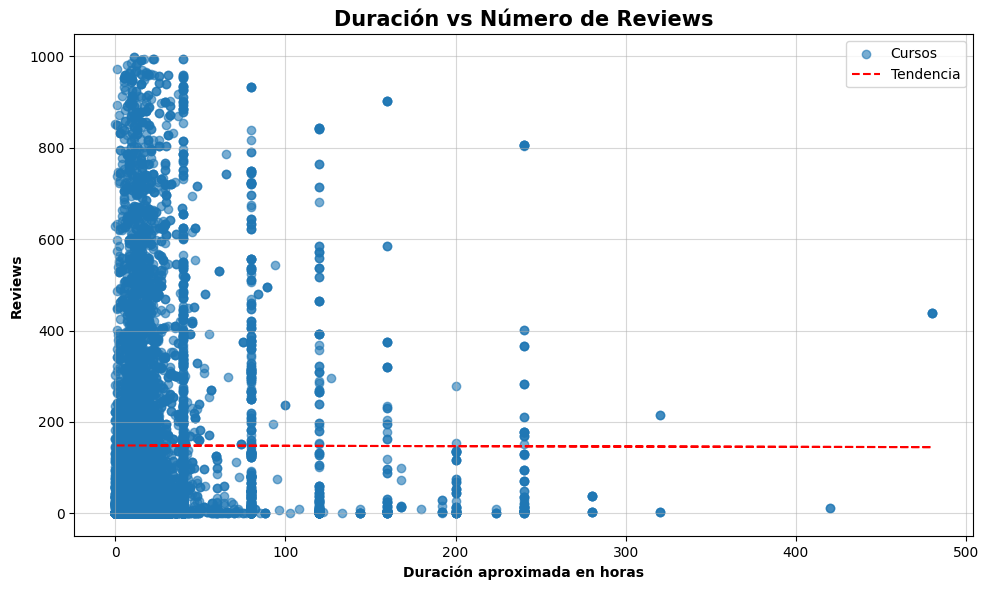

In [167]:
import numpy as np
import matplotlib.pyplot as plt

x = df['Duration']
y = df['Review']

# Eliminar valores NaN
mask = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[mask]
y_clean = y[mask]

# Calcular la regresión lineal
m, b = np.polyfit(x_clean, y_clean, 1)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x_clean, y_clean, alpha=0.6, color='tab:blue', label='Cursos')

# Agregar línea de tendencia
plt.plot(x_clean, m * x_clean + b, color='red', linestyle='--', label='Tendencia')

# Etiquetas
plt.title('Duración vs Número de Reviews', fontsize=15, fontweight='bold')
plt.xlabel('Duración aproximada en horas', fontsize=10, fontweight='bold')
plt.ylabel('Reviews', fontsize=10, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


- **Histograma de duración de cursos**

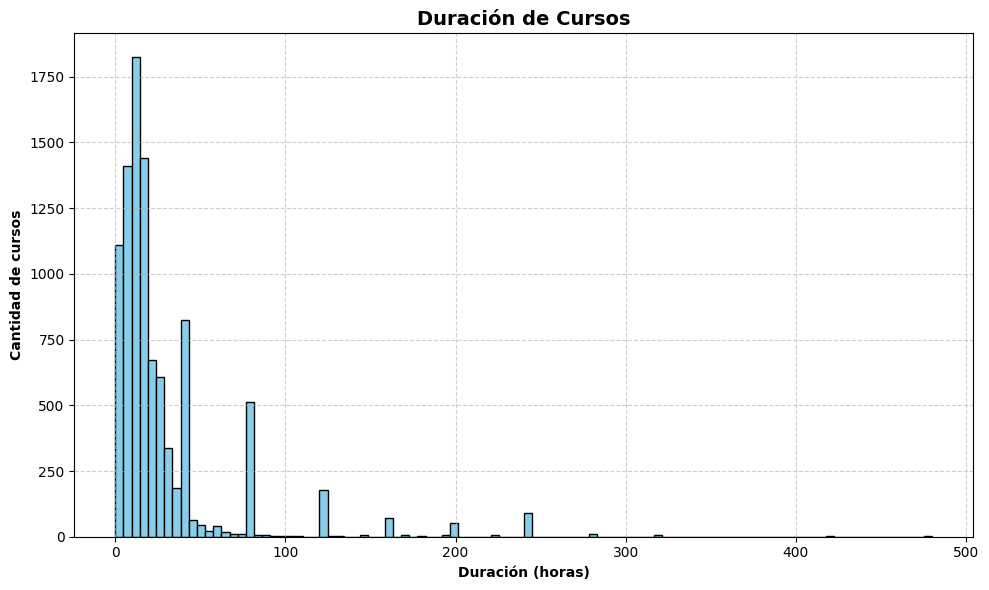

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Duration'].dropna(), bins=100, color='skyblue', edgecolor='black')  # ajusta `bins` para más o menos barras

plt.title('Duración de Cursos', fontsize=14, fontweight='bold')
plt.xlabel('Duración aproximada en horas', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de cursos', fontsize=10, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

